In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
IMAGE_SIZE1 = 250
IMAGE_SIZE2 = 400
CHANNELS = 3
BATCH_SIZE = 32
EPOCHS = 30

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size = (IMAGE_SIZE1, IMAGE_SIZE2),
    batch_size = BATCH_SIZE,
    class_mode = 'sparse'
)


Found 1905 images belonging to 5 classes.


In [21]:
train_generator.class_indices

{'healthy': 0,
 'invalid': 1,
 'mealy_bug': 2,
 'pineapple_wilt': 3,
 'root_rot': 4}

In [22]:
class_names = list(train_generator.class_indices.keys())
class_names

['healthy', 'invalid', 'mealy_bug', 'pineapple_wilt', 'root_rot']

In [3]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size = (IMAGE_SIZE1, IMAGE_SIZE2),
    batch_size = BATCH_SIZE,
    class_mode = 'sparse'
)

Found 269 images belonging to 5 classes.


In [4]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size = (IMAGE_SIZE1, IMAGE_SIZE2),
    batch_size = BATCH_SIZE,
    class_mode = 'sparse'
)

Found 551 images belonging to 5 classes.


In [5]:
# Step 01
# Define Neural Network Architecture
# relu is popular since it is very fast to compute
# softmax normalize the probability of your classes

input_shape = (IMAGE_SIZE1, IMAGE_SIZE2, CHANNELS)
n_classes = 5

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'), 
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 398, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 199, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 197, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 98, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 96, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 48, 64)       0

In [7]:
# Step 02
# Compiling the model using optimizers
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# accuracy - Tracking the training process

In [14]:
1905/32

59.53125

In [15]:
269/32

8.40625

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=60,
    batch_size=BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=8,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/30
60/60 [==============================] - 229s 4s/step - loss: 1.0071 - accuracy: 0.5921 - val_loss: 0.9069 - val_accuracy: 0.6406
Epoch 2/30
60/60 [==============================] - 220s 4s/step - loss: 0.5917 - accuracy: 0.7727 - val_loss: 0.2705 - val_accuracy: 0.9102
Epoch 3/30
60/60 [==============================] - 220s 4s/step - loss: 0.3489 - accuracy: 0.8782 - val_loss: 0.3589 - val_accuracy: 0.8828
Epoch 4/30
60/60 [==============================] - 220s 4s/step - loss: 0.3169 - accuracy: 0.8898 - val_loss: 0.4743 - val_accuracy: 0.7891
Epoch 5/30
60/60 [==============================] - 219s 4s/step - loss: 0.3179 - accuracy: 0.8856 - val_loss: 0.4331 - val_accuracy: 0.8438
Epoch 6/30
60/60 [==============================] - 218s 4s/step - loss: 0.2233 - accuracy: 0.9286 - val_loss: 0.2028 - val_accuracy: 0.9219
Epoch 7/30
60/60 [==============================] - 215s 4s/step - loss: 0.2301 - accuracy: 0.9197 - val_loss: 0.1557 - val_accuracy: 0.9453
Epoch 8/30
60

In [9]:
# Testing the model
scores = model.evaluate(test_generator)

18/18 [==============================] - 29s 2s/step - loss: 0.0970 - accuracy: 0.9673


In [10]:
scores

[0.09701620042324066, 0.967332124710083]

## Plotting Accuracy and Loss Curves

In [11]:
history

In [12]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 60}

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [14]:
#show loss for first 5 epochs
history.history['loss'][:5]

[1.0070818662643433,
 0.5917320251464844,
 0.3488802909851074,
 0.31688031554222107,
 0.31786587834358215]

In [15]:
history.history['accuracy']

[0.5921260118484497,
 0.7727034091949463,
 0.8782151937484741,
 0.8897637724876404,
 0.8855643272399902,
 0.9286088943481445,
 0.9196850657463074,
 0.925984263420105,
 0.9595800638198853,
 0.9317585229873657,
 0.9601050019264221,
 0.9758530259132385,
 0.9774278402328491,
 0.9858267903327942,
 0.9800524711608887,
 0.9774278402328491,
 0.9769029021263123,
 0.98740154504776,
 0.969028890132904,
 0.9858267903327942,
 0.9889763593673706,
 0.9921259880065918,
 0.9837270379066467,
 0.9805774092674255,
 0.9774278402328491,
 0.9858267903327942,
 0.986351728439331,
 0.9853018522262573,
 0.9805774092674255,
 0.969028890132904]

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

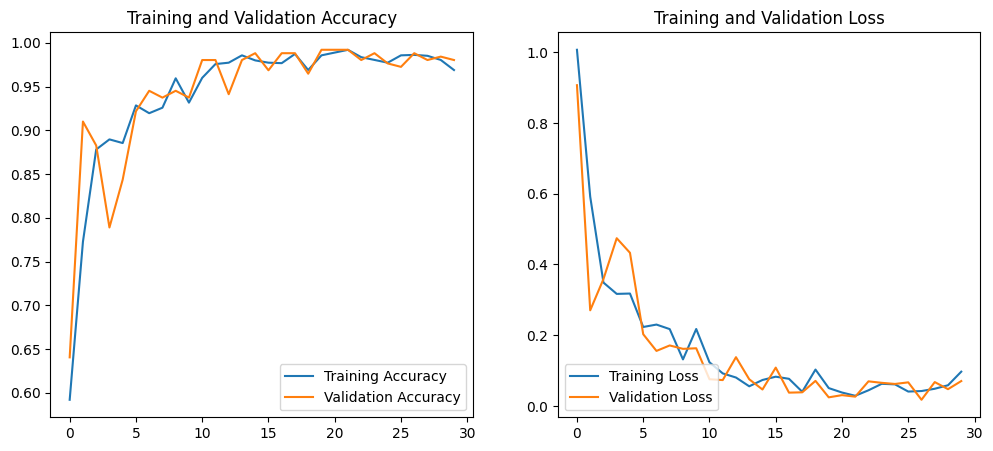

In [17]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.show()

## Run prediction on sample image

First image to predict
Actual Label:  root_rot
1/1 [==============================] - 0s 490ms/step
Predicted Label:  root_rot


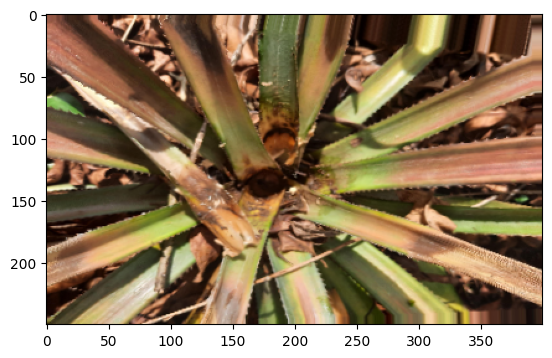

In [24]:
import numpy as np

for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label: ", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted Label: ", class_names[np.argmax(batch_prediction[0])])
    
    break

In [25]:
# Function to predict

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 38ms/step


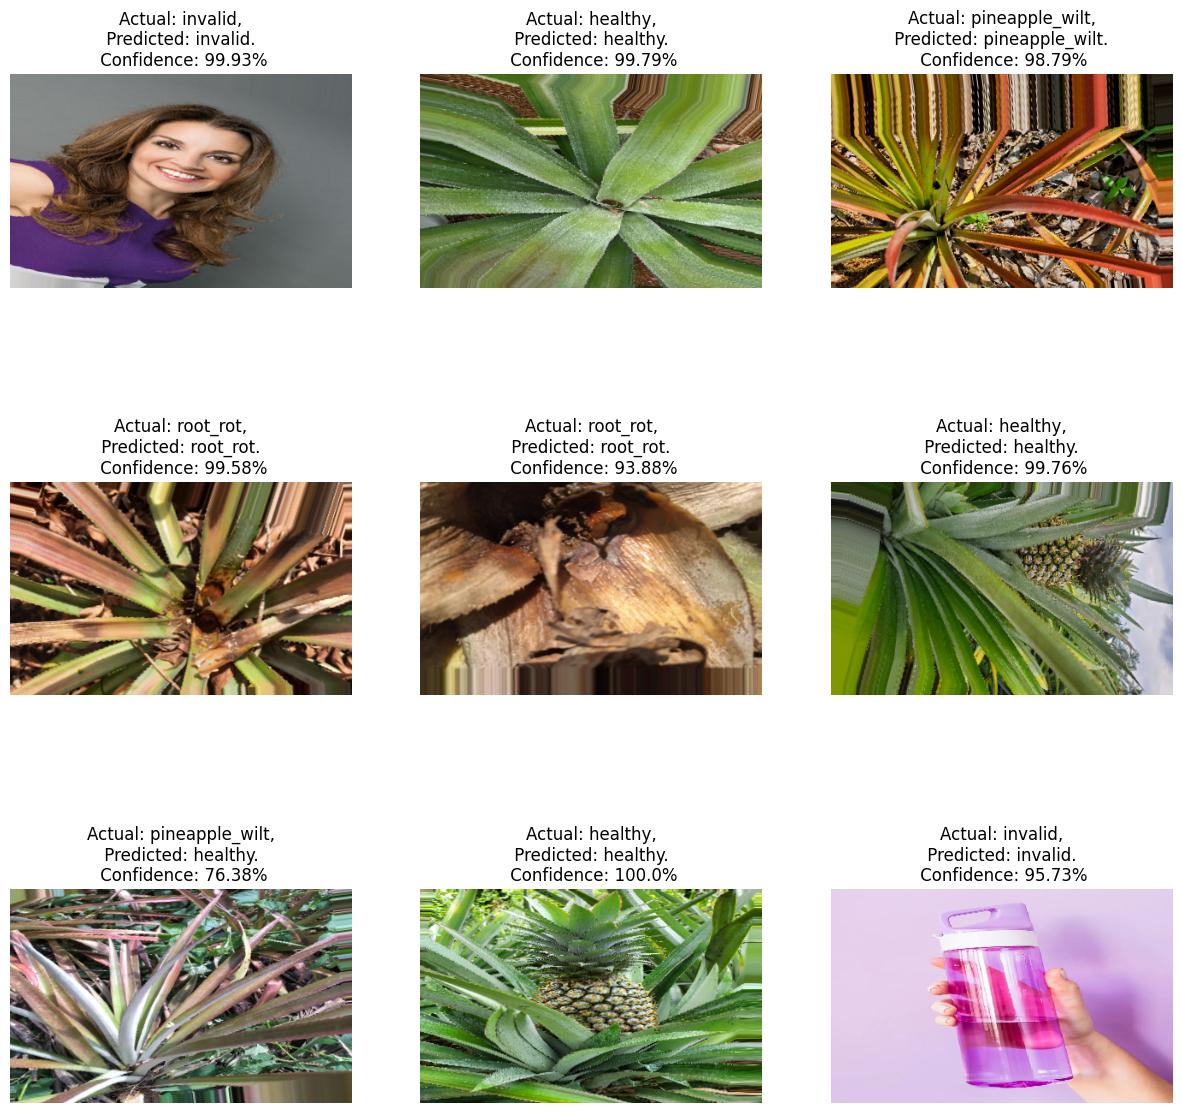

In [27]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}. \n Confidence: {confidence}%")
        
        plt.axis("off")
        
    break

## Saving the model

In [28]:
model.save(f"../saved_models/pineapple.h5")

In [29]:
model_version=5
model.save(f"../saved_models/Pineapple_CNN_{model_version}")

INFO:tensorflow:Assets written to: ../saved_models/Pineapple_CNN_5\assets


INFO:tensorflow:Assets written to: ../saved_models/Pineapple_CNN_5\assets
